In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

import astropy.units as u
from astropy.coordinates.sky_coordinate import SkyCoord
from astropy.units import Quantity
from astroquery.gaia import Gaia # Default is DR3

In [2]:
job = Gaia.launch_job("select top 1 source_id,pf from gaiadr3.vari_rrlyrae order by source_id")
r = job.get_results()
sid, period = r['source_id'].value[0], r['pf'].value[0]
print(sid, period)

177571127944832 0.6163799187143321


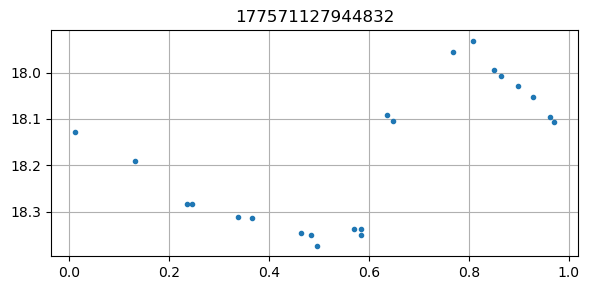

In [3]:
Gaia.VALID_DATALINK_RETRIEVAL_TYPES = "EPOCH_PHOTOMETRY"
Gaia.get_datalinks([sid])

datalink = Gaia.load_data(ids=str(sid), data_release='Gaia DR3', 
                          retrieval_type='EPOCH_PHOTOMETRY', format='csv')
df = next(iter(datalink.values()))[0].to_pandas()
df.to_csv('example.csv')

time, mag = df.loc[df["band"] == 'G'][['time', 'mag']].values.T
fig, ax = plt.subplots(figsize=(6, 3), tight_layout=True)
ax.plot(np.mod(time, period)/period, mag, '.')
ax.invert_yaxis()
ax.grid()
ax.set_title(sid);